# Compare SVM with other models with same dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [ ]:
def load_all_results():
    report_path = "../../../notebooks/artifacts/punctuation_no_stop_words/test_results.csv"
    svm_path = "../artifacts/svm/test_results.csv"
    bert_path = "../artifacts/bert/test_results.csv"
    
    df_main = pd.read_csv(report_path)
    df_svm = pd.read_csv(svm_path)
    df_bert = pd.read_csv(bert_path)
    
    # Combine them into one DataFrame
    combined_df = pd.concat([df_main, df_svm, df_bert], ignore_index=True)
    
    # Ensure all columns are numeric for plotting (except Model)
    # This handles any 'stillrunning' strings if they were saved to the CSV
    metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    for metric in metrics:
        combined_df[metric] = pd.to_numeric(combined_df[metric], errors='coerce')
    
    # Drop rows that ended up with NaN after conversion (if any)
    combined_df = combined_df.rename(columns={'Unnamed: 0': 'Model'})
    return combined_df.dropna(subset=['accuracy'])

df = load_all_results()
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

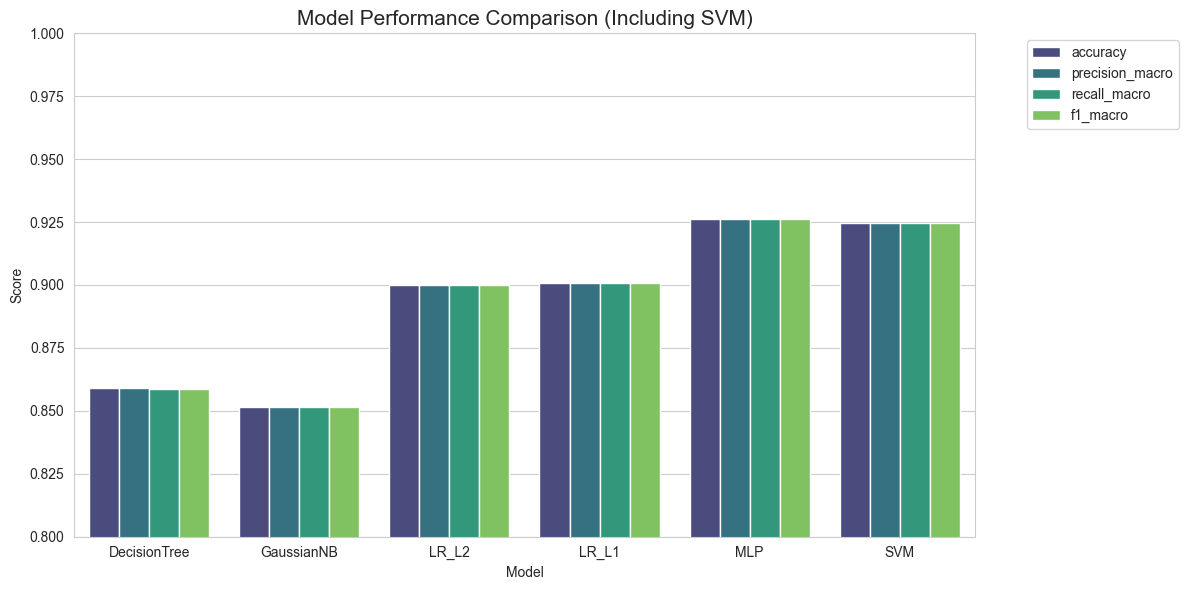

In [11]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a grouped bar chart
plot = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="viridis")

# Formatting
plt.title("Model Performance Comparison (Including SVM)", fontsize=15)
plt.ylim(0.8, 1.0)  # Adjusting view to see small differences
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

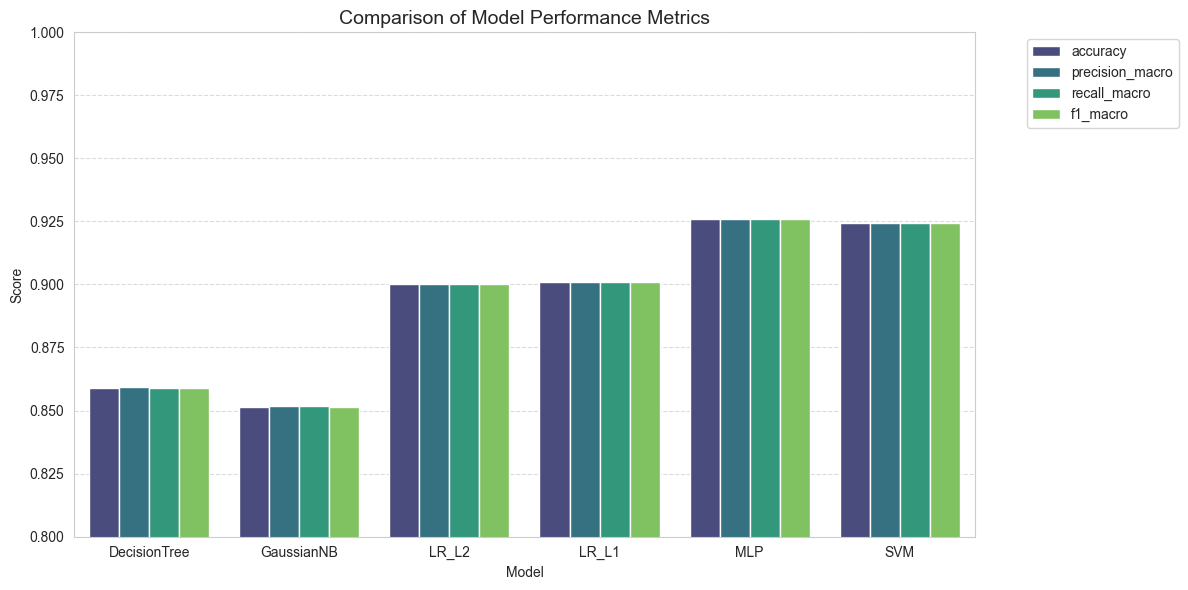

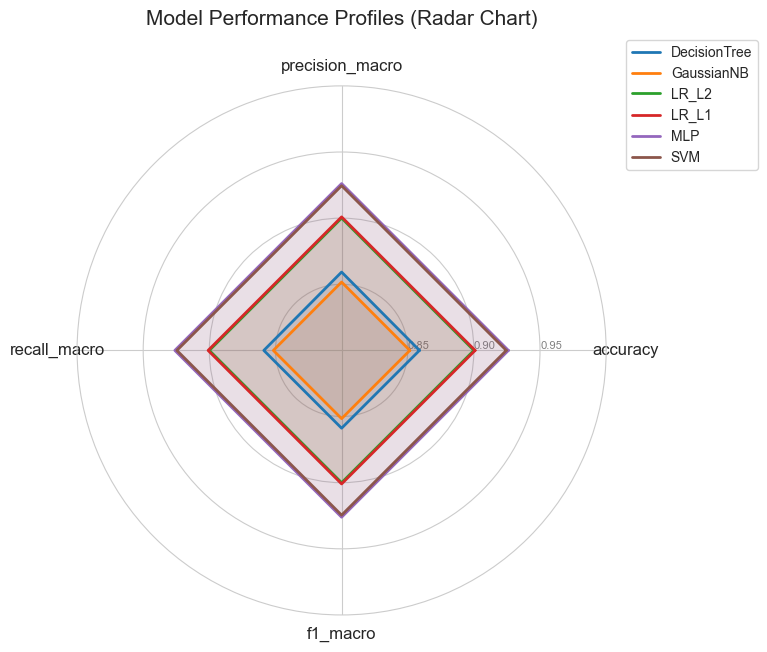

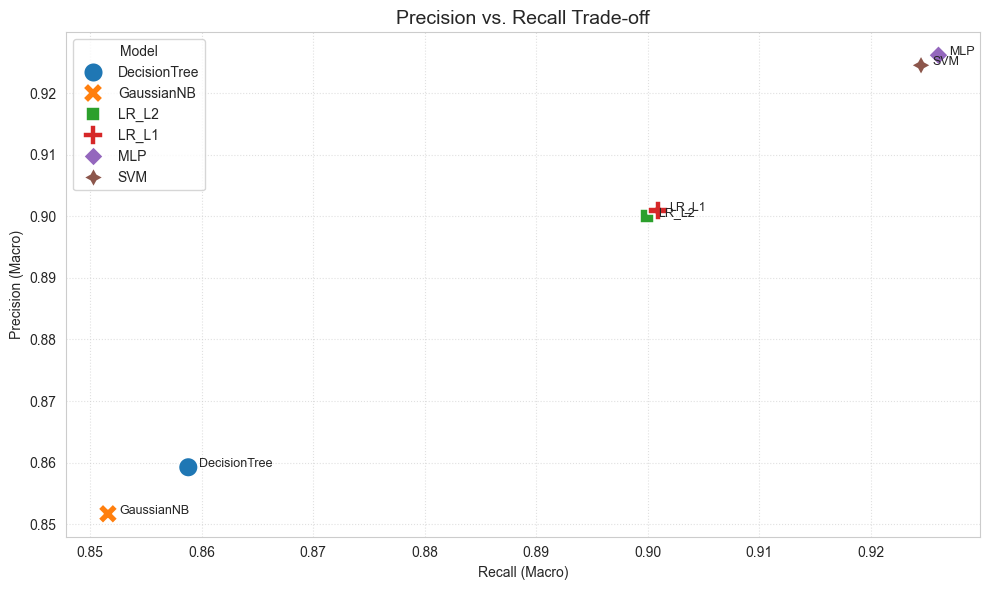

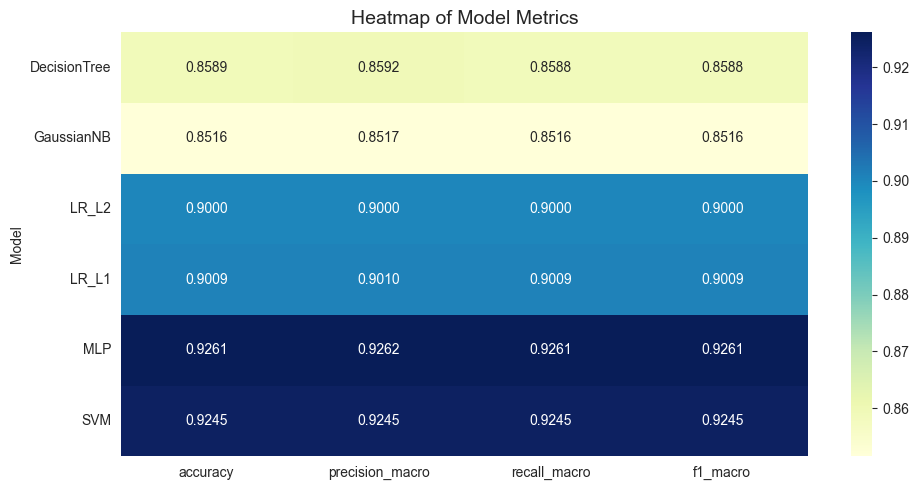

In [12]:
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
# --- GRAPH 1: Modern Grouped Bar Chart ---
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('Comparison of Model Performance Metrics', fontsize=14)
plt.ylim(0.8, 1.0) # Zoom in to see differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../../assets/best_dataset_models_comparison/grouped_bar_chart.png')

# --- GRAPH 2: Radar (Spider) Chart ---
def create_radar_chart(df, metrics):
    categories = metrics
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1] # Close the circle
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, row in df.iterrows():
        values = row[metrics].values.flatten().tolist()
        values += values[:1] # Close the circle
        ax.plot(angles, values, linewidth=2, label=row['Model'])
        ax.fill(angles, values, alpha=0.1)
    
    plt.xticks(angles[:-1], categories, size=12)
    ax.set_rlabel_position(0)
    plt.yticks([0.85, 0.90, 0.95], ["0.85", "0.90", "0.95"], color="grey", size=8)
    plt.ylim(0.8, 1.0)
    plt.title('Model Performance Profiles (Radar Chart)', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.savefig('../../assets/best_dataset_models_comparison/radar_chart.png')

create_radar_chart(df, metrics)

# --- GRAPH 3: Precision-Recall Trade-off (Scatter Plot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='recall_macro', y='precision_macro', hue='Model', s=200, style='Model')
plt.title('Precision vs. Recall Trade-off', fontsize=14)
plt.xlabel('Recall (Macro)')
plt.ylabel('Precision (Macro)')

# Label each point so you don't just rely on the legend
for i in range(df.shape[0]):
    plt.text(df.recall_macro[i]+0.001, df.precision_macro[i], df.Model[i], fontsize=9)

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('../../assets/best_dataset_models_comparison/precision_recall_scatter.png')

# --- GRAPH 4: Heatmap of Results ---
plt.figure(figsize=(10, 5))
heatmap_data = df.set_index('Model')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('Heatmap of Model Metrics', fontsize=14)
plt.tight_layout()
plt.savefig('../../assets/best_dataset_models_comparison/performance_heatmap.png')

plt.show()